In [1]:
import dask.bag as db
import json

In [2]:
allrecipes_bag = db.read_text('./packed/packed-*.json').map(json.loads)

In [3]:
allrecipes_bag.flatten().count().compute()

62303

In [4]:
ing_len_list = allrecipes_bag.flatten().map(lambda x: len(x['ingredients'])).compute()

In [5]:
dir_len_list = allrecipes_bag.flatten().map(lambda x: len(x['directions'])).compute()

In [6]:
from matplotlib.pyplot import hist
%matplotlib inline

(array([   0.,   59.,  530., 1813., 3335., 4995., 6039., 6403., 6548.,
        6216., 5764., 4744., 4007., 3081., 2352., 1680., 1369.,  994.,
         655.,  503.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 20 Patch objects>)

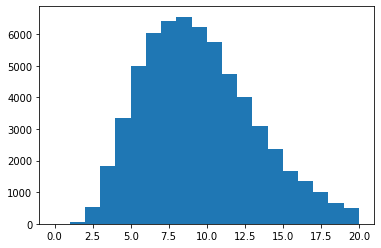

In [7]:
hist(list(filter(lambda x: x < 20 , ing_len_list)), bins = range(0,21))

(array([0.0000e+00, 8.8680e+03, 1.0501e+04, 1.6461e+04, 1.2792e+04,
        7.0340e+03, 3.4140e+03, 1.6410e+03, 7.7700e+02, 3.7200e+02,
        1.7600e+02, 1.2300e+02, 6.9000e+01, 2.8000e+01, 1.5000e+01,
        1.2000e+01, 4.0000e+00, 3.0000e+00, 4.0000e+00, 5.0000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 20 Patch objects>)

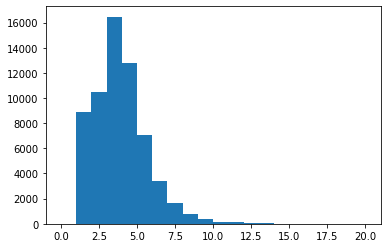

In [8]:
hist(list(filter(lambda x: x < 20 , dir_len_list)), bins = range(0,21))

In [9]:
import pandas as pd

In [10]:
frame = pd.DataFrame({"ingredients length": ing_len_list, "directions length": dir_len_list})

In [11]:
frame.describe()

,ingredients length,directions length
count,62303.000000,62303.000000
mean,9.275781,3.405807
std,4.081934,1.790920
min,1.000000,1.000000
25%,6.000000,2.000000
50%,9.000000,3.000000
75%,12.000000,4.000000
max,52.000000,27.000000
